In [585]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
import numpy as np
import pandas as pd
from scipy.special import hankel2
from scipy.special import jv


In [586]:

def distance(x_i, y_i, x, y):
    # d = math.sqrt((x - x_i)**2 + (y - y_i)**2)
    d = np.sqrt((x - x_i)**2 + (y - y_i)**2)
    return d

In [587]:
def permitivity(x,y):    #relative permitivity
    d = math.sqrt(x**2 + y**2)
    if d <= r_b:
        return  complex(2.1, 0)
        # return 2.1
    elif d <= r_a:
        # return  3.6
        return  complex(3.6, -0.2)
    else:
        return  complex(1, 0)  

In [588]:
def E_inc(x_i,y_i,x_s,y_s,e_i):
    r = distance(x_i,y_i,x_s,y_s)
    # ei = permitivity(x_i,y_i)
    Eo = k**2 / (4 * e_i * 2* math.pi * f * 8.854e-12)  #has to check for correct coeff
    E = Eo * hankel2(0,k*r)
    # E = hankel2(0,k*r)
    return E

In [589]:

def coord_scatterers(scatterer_no):
    
    i = scatterer_no - 1
    # r_c = 6e-2
    x_s = r_c  * math.cos(math.radians(22.5*i))
    y_s = r_c * math.sin(math.radians(22.5*i))
    return (x_s, y_s)

  
def coord_reciever(scatterer_no):
    i = scatterer_no - 1
    my_list = coord_tx_rx(L)
    new_list = np.zeros((L-1,2))
    new_list = np.delete(my_list, i, axis=0)  # Remove along rows
    return  new_list
   

In [590]:
def coord_tx_rx(L):
      
    new_list = np.zeros((L,2))
    for i in range (L):
        x_s = r_c * math.cos(math.radians(22.5*i))
        y_s = r_c * math.sin(math.radians(22.5*i))
        new_list[i][0] = x_s
        new_list[i][1] = y_s
   
    return  new_list

In [591]:

r_b = 0.75e-2
r_a = 1.5e-2
r_c = 6e-2

a_n = 5e-3 / math.sqrt(math.pi)  #equivalent radius

c = 3e8
f = 3e9
lambda_ = c/f

# r_b = 2e-2
# r_a = 3e-2
# r_c = 5e-2

# a_n = 2.5e-3 / math.sqrt(math.pi)  #equivalent radius

# c = 3e8
# f = 1e9
# lambda_ = c/f

k = (2*math.pi )/lambda_

# dx = c/(15 * f * math.sqrt(3.6))

dx = 0.005 #given in question
print(dx, 2*r_a/dx)
dzn = 2*r_a/dx
m = int(dzn)
n = int(dzn)
# print(m)
dim = m*n 

L = 16
dphi = 360/16


0.005 6.0


Number of rows before filtering: 36
Number of rows after filtering: 32


c:\Python39\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Python39\lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


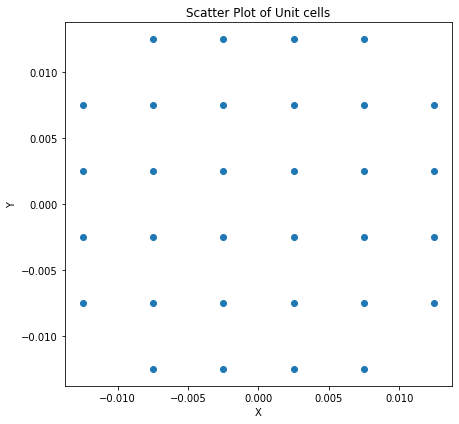

In [592]:

cell_matrix = np.zeros((dim, 3),dtype="complex128")
x_temp, y_temp = 0.0, 0.0
for i in range(m):
    y_temp = (r_a - r_a/m - i*(2*r_a/(m)))
    for j in range(n):
        x_temp = (-r_a + r_a/m + j*(2*r_a/(m)))
        
        cell_matrix[m*i+j][0] = x_temp  
        cell_matrix[m*i+j][1] = y_temp
        cell_matrix[m*i+j][2] = permitivity(x_temp,y_temp)

		
euclidean_distance = np.sqrt(cell_matrix[:, 0]**2 + cell_matrix[:, 1]**2)

# Filter out rows where the Euclidean distance is greater than 3
filtered_matrix = cell_matrix[euclidean_distance <= r_a]

# Print the number of rows before and after filtering
print("Number of rows before filtering:", cell_matrix.shape[0])
print("Number of rows after filtering:", filtered_matrix.shape[0])
		
dim = filtered_matrix.shape[0]
# print(dim)
cell_matrix = filtered_matrix  

# print(cell_matrix)

# # print coordinates matrix
# for row in matrix:
#     for element in row:
#         print(" ",element, end=" ")  
#     print() 
# print(matrix)


x = filtered_matrix[:, 0]
y = filtered_matrix[:, 1]
z = filtered_matrix[:, 2]

# Plot both the scatter plot of x vs y coordinates and the 3D scatter plot of x, y, and z coordinates
fig = plt.figure(figsize=(12, 6))

# Scatter plot of x vs y coordinates
ax1 = fig.add_subplot(121)
ax1.scatter(x, y)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Scatter Plot of Unit cells')

# 3D scatter plot of x, y, and z coordinates
# ax2 = fig.add_subplot(122, projection='3d')
# ax2.scatter(x, y, z)
# ax2.set_xlabel('X')
# ax2.set_ylabel('Y')
# ax2.set_zlabel('Z')
# ax2.set_title('3D Scatter Plot of X, Y, Z')

# Show the plots
plt.tight_layout()
plt.show()

(16, 32)


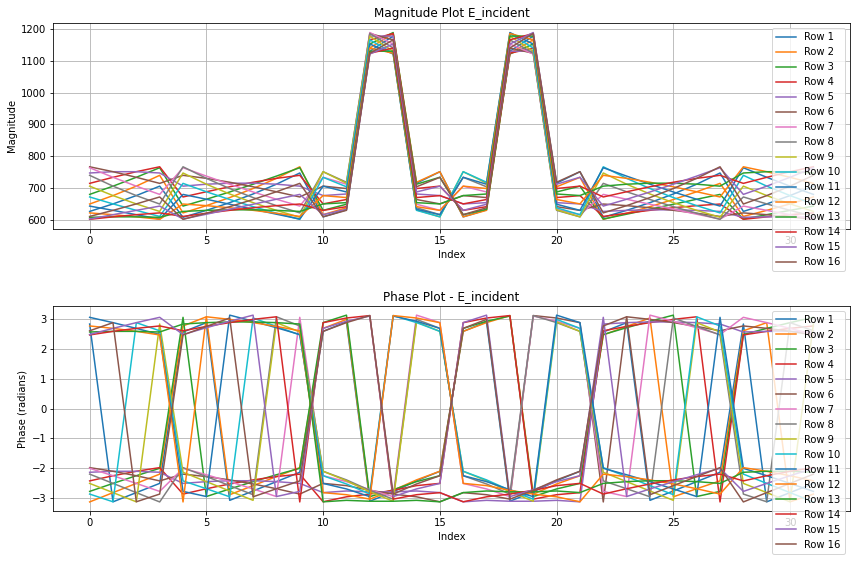

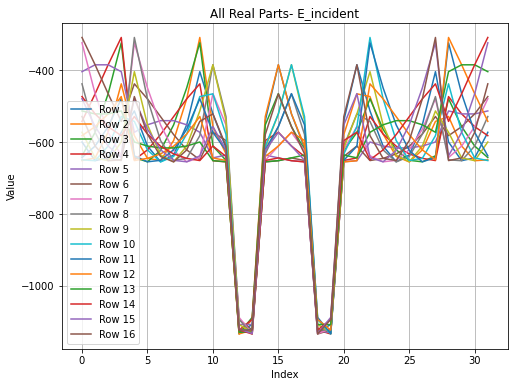

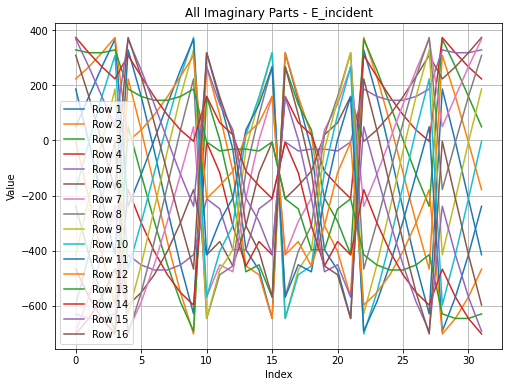

In [593]:

E_incident = np.empty((L,dim), dtype="complex128")
for j in range (L):
    x_sc, y_sc = coord_scatterers(j+1)  
      
    for i in range(0,dim):
        
        x_i, y_i, e_i =  cell_matrix[i][0], cell_matrix[i][1], cell_matrix[i][2]
        # print(x_i)
        # print(x_i,y_i) #works perfectly
        
        E_incident[j][i] = E_inc(x_i,y_i,x_sc,y_sc,e_i)
      
# print(E_incident,"incident fields")
print(E_incident.shape) #16*576

# Calculate magnitude and phase for each row
magnitudes = np.abs(E_incident)
phases = np.angle(E_incident)

# Plot magnitude and phase row-wise
plt.figure(figsize=(12, 8))

# Plot magnitude
plt.subplot(2, 1, 1)
for i in range(magnitudes.shape[0]):
    plt.plot(magnitudes[i, :], label=f'Row {i+1}')
plt.title('Magnitude Plot E_incident')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

# Plot phase
plt.subplot(2, 1, 2)
for i in range(phases.shape[0]):
    plt.plot(phases[i, :], label=f'Row {i+1}')
plt.title('Phase Plot - E_incident')
plt.xlabel('Index')
plt.ylabel('Phase (radians)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

all_real_parts = E_incident.real
all_imaginary_parts = E_incident.imag

# Plot all real parts
plt.figure(figsize=(8, 6))
for i in range(all_real_parts.shape[0]):
    plt.plot(all_real_parts[i, :], label=f'Row {i+1}')
plt.title('All Real Parts- E_incident')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Plot all imaginary parts
plt.figure(figsize=(8, 6))
for i in range(all_imaginary_parts.shape[0]):
    plt.plot(all_imaginary_parts[i, :], label=f'Row {i+1}')
plt.title('All Imaginary Parts - E_incident')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# # Create subplots for all graphs
# fig, axes = plt.subplots(4, 4, figsize=(12, 9))

# # Plot each row as a separate graph
# for i, ax in enumerate(axes.flatten()):
#     ax.plot(E_xy[i, :].real)  # Plot the i-th row
#     ax.set_title(f'Plot of Row {i+1}')  # Set title for the graph
#     ax.set_xlabel('Index')  # Set x-axis label
#     ax.set_ylabel('Value')  # Set y-axis label
#     ax.grid(True)  # Enable grid

# # Adjust layout and display the plots
# plt.tight_layout()
# plt.show()

In [594]:

C_matrix = np.empty((dim, dim), dtype='complex128')

for i in range(0,dim):
    x_m, y_m = cell_matrix[i][0], cell_matrix[i][1]
    
    for j in range (0, dim):
        
        x_n, y_n = cell_matrix[j][0], cell_matrix[j][1]
        
        e = cell_matrix[j][2]  #have to confirm 

        if i == j :
            # C_matrix[i][j] = 1 + complex(0,(1)* 1/2 * math.pi * k * a_n * hankel2(0,k*a_n)) #have to confirm about formula 
             C_matrix[i][j] = e + complex(0,(e - 1)* 1/2 * math.pi * k * a_n * hankel2(0,k*a_n)) #have to confirm about formula 
            
        else :
            # d = math.sqrt((x_m - x_n)**2 + (y_m - y_n)**2)
            d = np.sqrt((x_m - x_n)**2 + (y_m - y_n)**2)
            # if d != 0:
            C_matrix[i][j] = complex(0,(e - 1)* 1/2 * math.pi * k * a_n * hankel2(0,k*d) * jv(1, k*a_n))
            # C_matrix[i][j] = complex(0,( 1)* 1/2 * math.pi * k * a_n * hankel2(0,k*d) * jv(1, k*a_n))
            
     

# for row in C_matrix:
#     for element in row:
#         print("eno",element, end=" ")  
#     print() 

print(C_matrix.shape) #working fine ig

(32, 32)


In [595]:

C_inv = np.empty((dim, dim), dtype='complex128')
C_inv = np.linalg.inv(C_matrix)  

print(C_inv.shape)

# for row in C_inv:
#     for element in row:
#         print("eno",element, end=" ")  
#     print() 
#working fine till here

(32, 32)


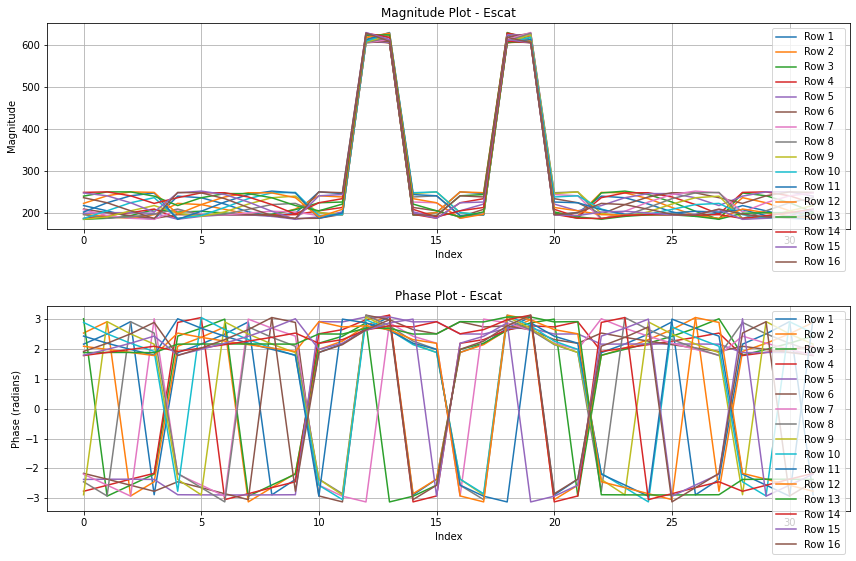

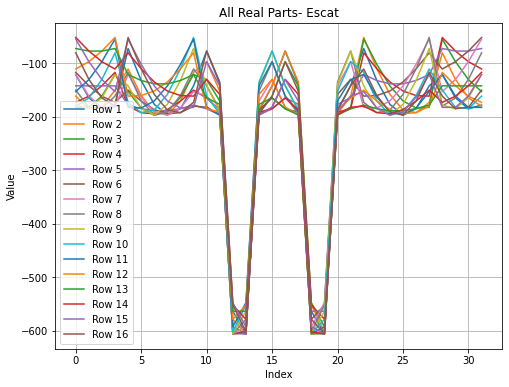

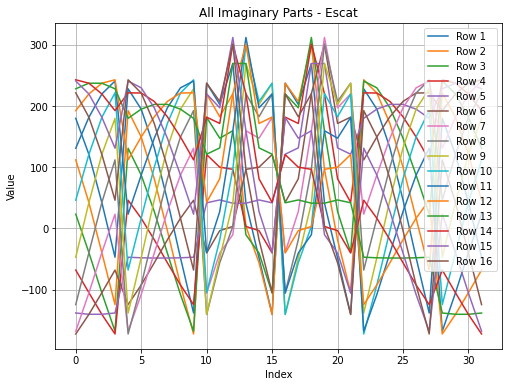

In [596]:

E_x = np.empty((L,dim), dtype='complex128')
for j in range (L):
    for i in range(0,dim):
         E_x[j][i] = np.dot(C_inv[i],E_incident[j])


# Calculate magnitude and phase for each row/
magnitudes = np.abs(E_x)
phases = np.angle(E_x)

# Plot magnitude and phase row-wise
plt.figure(figsize=(12, 8))

# Plot magnitude
plt.subplot(2, 1, 1)
for i in range(magnitudes.shape[0]):
    plt.plot(magnitudes[i, :], label=f'Row {i+1}')
plt.title('Magnitude Plot - Escat')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

# Plot phase
plt.subplot(2, 1, 2)
for i in range(phases.shape[0]):
    plt.plot(phases[i, :], label=f'Row {i+1}')
plt.title('Phase Plot - Escat')
plt.xlabel('Index')
plt.ylabel('Phase (radians)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

all_real_parts = E_x.real
all_imaginary_parts = E_x.imag

# Plot all real parts
plt.figure(figsize=(8, 6))
for i in range(all_real_parts.shape[0]):
    plt.plot(all_real_parts[i, :], label=f'Row {i+1}')
plt.title('All Real Parts- Escat')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Plot all imaginary parts
plt.figure(figsize=(8, 6))
for i in range(all_imaginary_parts.shape[0]):
    plt.plot(all_imaginary_parts[i, :], label=f'Row {i+1}')
plt.title('All Imaginary Parts - Escat')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Create subplots for all graphs
# fig, axes = plt.subplots(4, 4, figsize=(12, 9))

# # Plot each row as a separate graph
# for i, ax in enumerate(axes.flatten()):
#     ax.plot(E_xy[i, :].real)  # Plot the i-th row
#     ax.set_title(f'Plot of Row {i+1}')  # Set title for the graph
#     ax.set_xlabel('Index')  # Set x-axis label
#     ax.set_ylabel('Value')  # Set y-axis label
#     ax.grid(True)  # Enable grid

# # Adjust layout and display the plots
# plt.tight_layout()
# plt.show()

#seems fine till now


(16, 32)


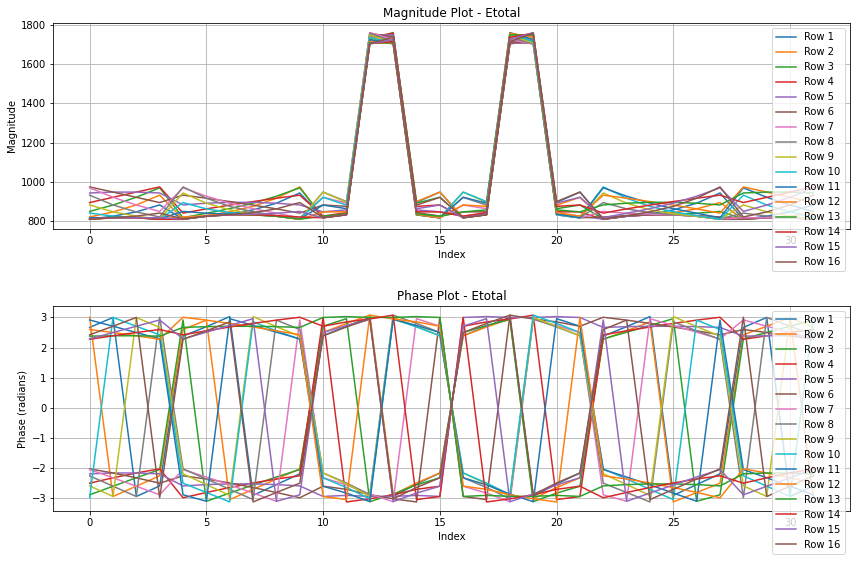

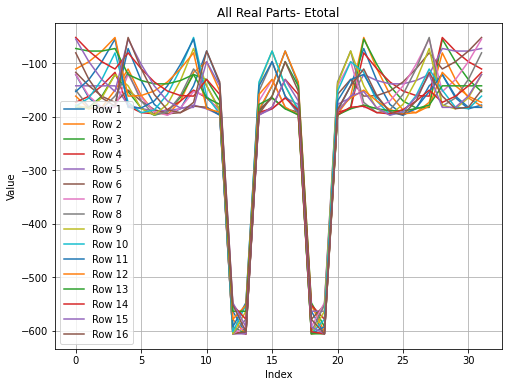

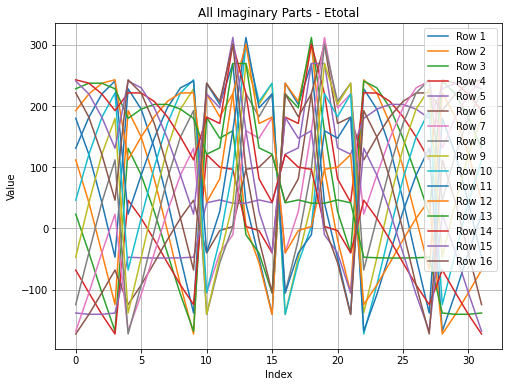

In [597]:

E_total = np.empty((L,dim), dtype='complex128')
E_total = E_incident + E_x
# E_total =  E_x

# print(E_total)
print(E_total.shape)

magnitudes = np.abs(E_total)
phases = np.angle(E_total)

# Plot magnitude and phase row-wise
plt.figure(figsize=(12, 8))

# Plot magnitude
plt.subplot(2, 1, 1)
for i in range(magnitudes.shape[0]):
    plt.plot(magnitudes[i, :], label=f'Row {i+1}')
plt.title('Magnitude Plot - Etotal')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

# Plot phase
plt.subplot(2, 1, 2)
for i in range(phases.shape[0]):
    plt.plot(phases[i, :], label=f'Row {i+1}')
plt.title('Phase Plot - Etotal')
plt.xlabel('Index')
plt.ylabel('Phase (radians)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

all_real_parts = E_x.real
all_imaginary_parts = E_x.imag

# Plot all real parts
plt.figure(figsize=(8, 6))
for i in range(all_real_parts.shape[0]):
    plt.plot(all_real_parts[i, :], label=f'Row {i+1}')
plt.title('All Real Parts- Etotal')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Plot all imaginary parts
plt.figure(figsize=(8, 6))
for i in range(all_imaginary_parts.shape[0]):
    plt.plot(all_imaginary_parts[i, :], label=f'Row {i+1}')
plt.title('All Imaginary Parts - Etotal')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


all [[ 6.00000000e-02  0.00000000e+00]
 [ 5.54327720e-02  2.29610059e-02]
 [ 4.24264069e-02  4.24264069e-02]
 [ 2.29610059e-02  5.54327720e-02]
 [ 3.67394040e-18  6.00000000e-02]
 [-2.29610059e-02  5.54327720e-02]
 [-4.24264069e-02  4.24264069e-02]
 [-5.54327720e-02  2.29610059e-02]
 [-6.00000000e-02  7.34788079e-18]
 [-5.54327720e-02 -2.29610059e-02]
 [-4.24264069e-02 -4.24264069e-02]
 [-2.29610059e-02 -5.54327720e-02]
 [-1.10218212e-17 -6.00000000e-02]
 [ 2.29610059e-02 -5.54327720e-02]
 [ 4.24264069e-02 -4.24264069e-02]
 [ 5.54327720e-02 -2.29610059e-02]]


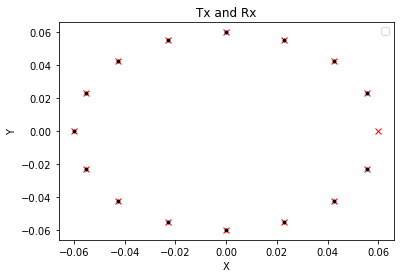

In [598]:

all_points = coord_tx_rx(L)
scatterer_points = coord_scatterers(5)
receiver_points = coord_reciever(1)

print("all",all_points)
# print("tra",scatterer_points)
# print("reciev",receiver_points)

# Plot "all" as bold blue color
plt.plot(all_points[:, 0], all_points[:, 1], 'rx')

# Plot "sc" as black dots
# plt.plot(scatterer_points[:], 'k.', label='T_x')

# Plot "cr" as red crosses
plt.plot(receiver_points[:, 0], receiver_points[:, 1], 'k.')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Tx and Rx')

# Add legend
plt.legend()

# Show the plot
plt.show()

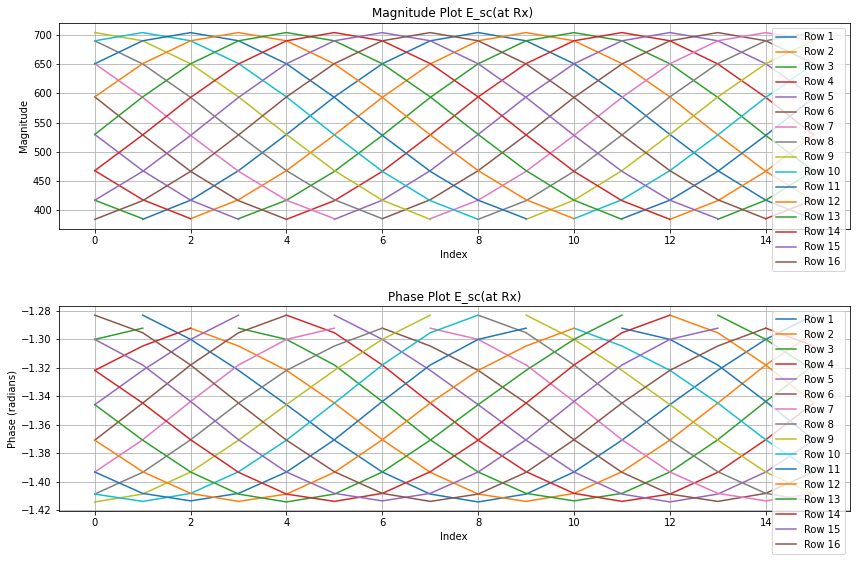

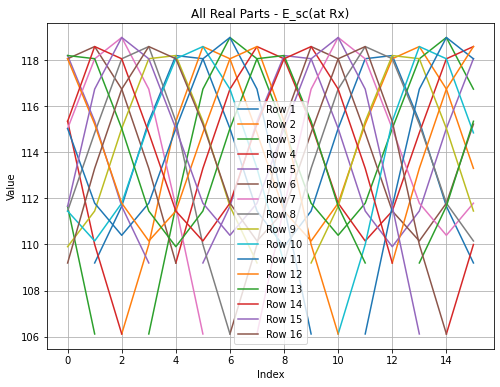

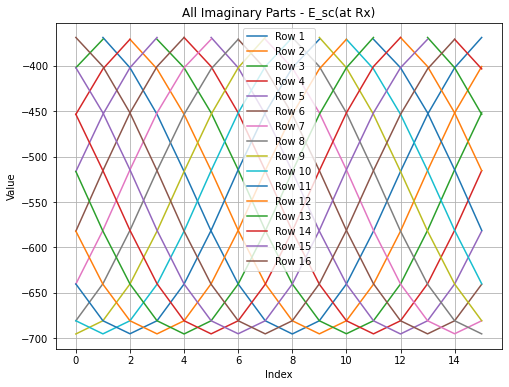

In [599]:

#scattered field outside the dielectric body any point 
E_xy = np.empty((16,16), dtype="complex128")
#done 16 times, for 15 receivers at a time
kf = (2*math.pi )/lambda_ 


for k in range(L):
    x_sc, y_sc = coord_scatterers(k+1)  
    # e_i = permitivity(x_sc,y_sc)
    receiver_points = coord_tx_rx(16)
    # print(receiver_points)   #15*2
    
    for i in range (L):
        x_s, y_s = receiver_points[i][0] , receiver_points[i][1] #coordinate for receiver i
        # print(x_s,y_s)
        
        if x_s == x_sc and y_s == y_sc:
            E_xy[k][i] = None
            
        else:
            sum = 0

            for j in range(dim):
                x_n , y_n, e_n = cell_matrix[j][0], cell_matrix[j][1], cell_matrix[j][2]
                d = distance(x_s,y_s,x_n,y_n)  
                sum += (e_n - 1) * E_total[k][j] * a_n * hankel2(0,kf*d) * jv(1, kf*a_n)
                
            E_xy[k][i] = complex(0, -1/2 * math.pi * kf *sum )
            
# print(E_xy.shape)
# print(E_xy[0])
# print(E_xy[10])
# print(E_xy[15])


# Calculate magnitude and phase for each row
magnitudes = np.abs(E_xy)
phases = np.angle(E_xy)

# Plot magnitude and phase row-wise
plt.figure(figsize=(12, 8))

# Plot magnitude
plt.subplot(2, 1, 1)
for i in range(magnitudes.shape[0]):
    plt.plot(magnitudes[i, :], label=f'Row {i+1}')
plt.title('Magnitude Plot E_sc(at Rx) ')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

# Plot phase
plt.subplot(2, 1, 2)
for i in range(phases.shape[0]):
    plt.plot(phases[i, :], label=f'Row {i+1}')
plt.title('Phase Plot E_sc(at Rx)')
plt.xlabel('Index')
plt.ylabel('Phase (radians)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

all_real_parts = E_xy.real
all_imaginary_parts = E_xy.imag

# Plot all real parts
plt.figure(figsize=(8, 6))
for i in range(all_real_parts.shape[0]):
    plt.plot(all_real_parts[i, :], label=f'Row {i+1}')
plt.title('All Real Parts - E_sc(at Rx)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Plot all imaginary parts
plt.figure(figsize=(8, 6))
for i in range(all_imaginary_parts.shape[0]):
    plt.plot(all_imaginary_parts[i, :], label=f'Row {i+1}')
plt.title('All Imaginary Parts - E_sc(at Rx)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# # Create subplots for all graphs
# fig, axes = plt.subplots(4, 4, figsize=(12, 9))

# # Plot each row as a separate graph
# for i, ax in enumerate(axes.flatten()):
#     ax.plot(E_xy[i, :].real)  # Plot the i-th row
#     ax.set_title(f'Plot of Row {i+1}')  # Set title for the graph
#     ax.set_xlabel('Index')  # Set x-axis label
#     ax.set_ylabel('Value')  # Set y-axis label
#     ax.grid(True)  # Enable grid

# # Adjust layout and display the plots
# plt.tight_layout()
# plt.show()


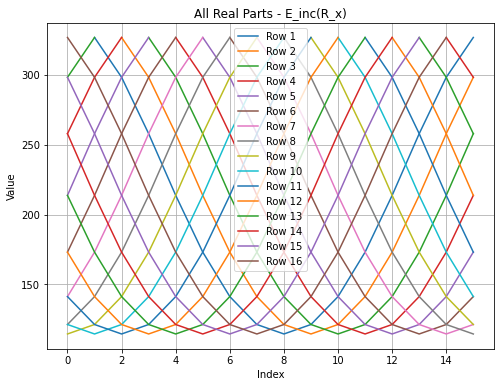

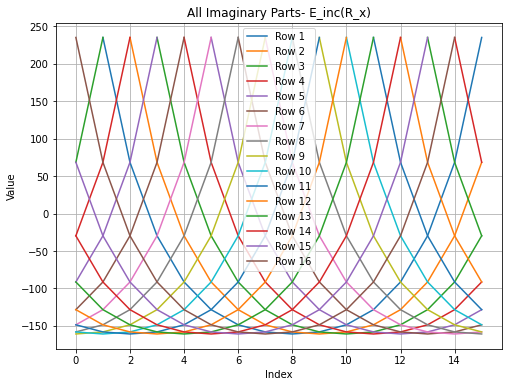

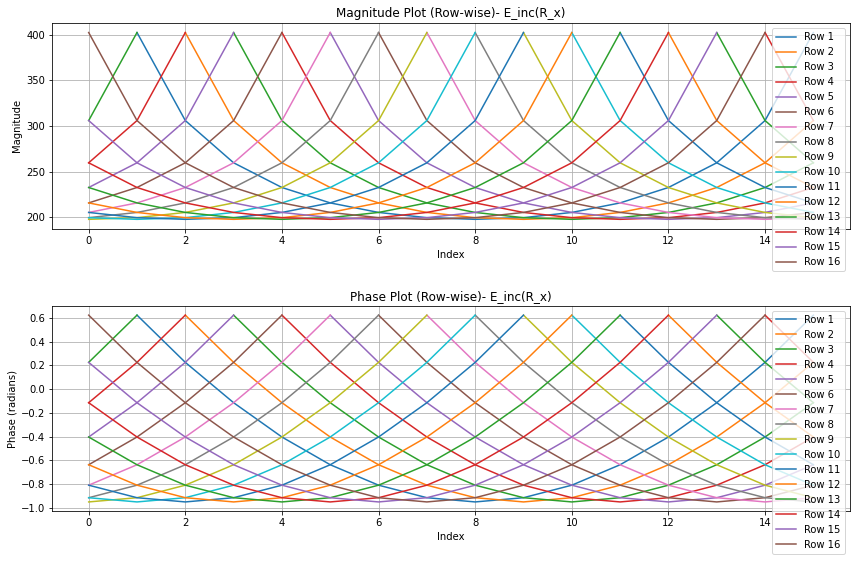

In [600]:

E_inc_5 = np.empty((16,16), dtype ="complex128")


# E_incident = np.empty((L,dim), dtype="complex128")
for i in range (L):
    x_sc, y_sc = coord_scatterers(i+1)  
    e_i = permitivity(x_sc,y_sc)
    
    receiver_points = coord_tx_rx(16)
    
    for j in range (L):
                  
        x_i, y_i =  receiver_points[j][0] , receiver_points[j][1]
        
        if x_i == x_sc and y_i == y_sc:
            E_inc_5[i][j] = None
        else:
            
            # print(x_i,y_i) #works perfectly
            
            E_inc_5[i][j] = E_inc(x_i,y_i,x_sc,y_sc,e_i)
        
    
    # E_inc_5[i] = E_inc_5[i][:i] + [0] + E_inc_5[i][i:]
    
# print(E_inc_5[0])
# print(E_inc_5[9])
# print(E_inc_5[15])


all_real_parts = E_inc_5.real
all_imaginary_parts = E_inc_5.imag

# Plot all real parts
plt.figure(figsize=(8, 6))
for i in range(all_real_parts.shape[0]):
    plt.plot(all_real_parts[i, :], label=f'Row {i+1}')
plt.title('All Real Parts - E_inc(R_x)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Plot all imaginary parts
plt.figure(figsize=(8, 6))
for i in range(all_imaginary_parts.shape[0]):
    plt.plot(all_imaginary_parts[i, :], label=f'Row {i+1}')
plt.title('All Imaginary Parts- E_inc(R_x)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


# Calculate magnitude and phase for each row
magnitudes = np.abs(E_inc_5)
phases = np.angle(E_inc_5)

# Plot magnitude and phase row-wise
plt.figure(figsize=(12, 8))

# Plot magnitude
plt.subplot(2, 1, 1)
for i in range(magnitudes.shape[0]):
    plt.plot(magnitudes[i, :], label=f'Row {i+1}')
plt.title('Magnitude Plot (Row-wise)- E_inc(R_x)')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

# Plot phase
plt.subplot(2, 1, 2)
for i in range(phases.shape[0]):
    plt.plot(phases[i, :], label=f'Row {i+1}')
plt.title('Phase Plot (Row-wise)- E_inc(R_x)')
plt.xlabel('Index')
plt.ylabel('Phase (radians)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [601]:

#final for all values
dat = [1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15],[16]
# dat = np.
data5 = np.repeat(dat, 16)

df = pd.DataFrame(coord_tx_rx(16), columns=['X', 'Y'])
# print(df)
duplicated_df = pd.concat([df] * 16, ignore_index=True)
# print(duplicated_df)
df = duplicated_df

all_real_parts1 = E_xy.real
all_imaginary_parts1 = E_xy.imag

data1 = all_real_parts1.flatten()
data2 = all_imaginary_parts1.flatten()
data3 = all_real_parts.flatten()
data4 = all_imaginary_parts.flatten()

df["Scatter no"] = data5
df['Escat_Real'] = data1
df['Escat_Imaginary'] = data2
df['Einc_Real'] = data3
df['Einc_Imaginary'] = data4

df = df.reindex(columns=['Scatter no', 'X', 'Y', 'Escat_Real','Escat_Imaginary','Einc_Real','Einc_Imaginary'])
# print(df)
df.to_excel('output.xlsx', index=False)

